# VAV Box Data Analysis

One image

In [1]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
from PIL import Image
import numpy as np
from IPython.display import display, HTML

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\bbartling\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

vav = r'C:\Users\bbartling\Desktop\AutonomousBuildingOperator\data\vav_1_1_20240706_101623.png'
vav_copy_1 = vav
vav_copy_2 = vav

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Mild upscaling of the image
    scale_percent = 150  # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
    
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresh

# Function to extract text from an image
def image_to_text(image_path):
    image = cv2.imread(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Function to display the image
def display_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title('Image')
    plt.axis('off')
    plt.show()


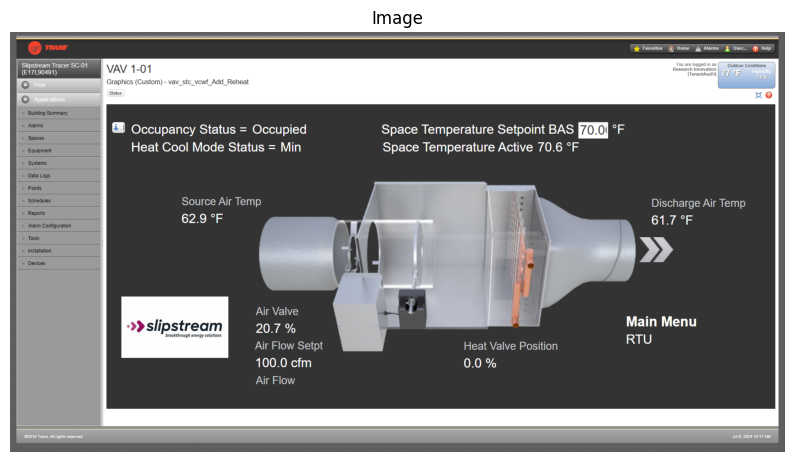

In [2]:
# Read the image using OpenCV
image = cv2.imread(vav)

display_image(image)


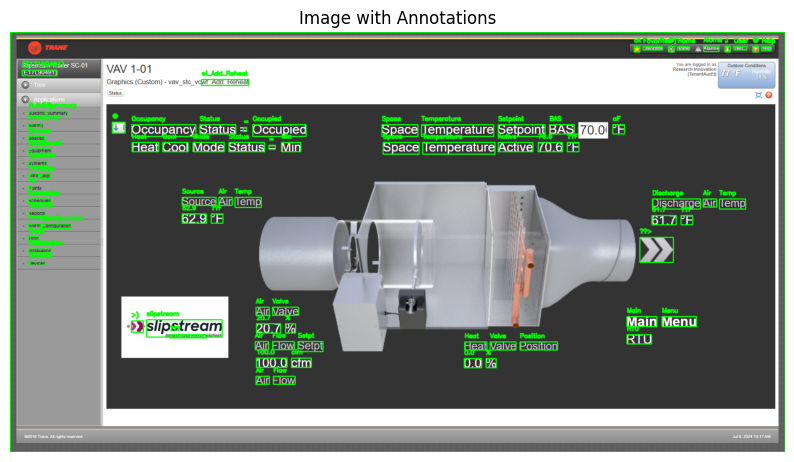

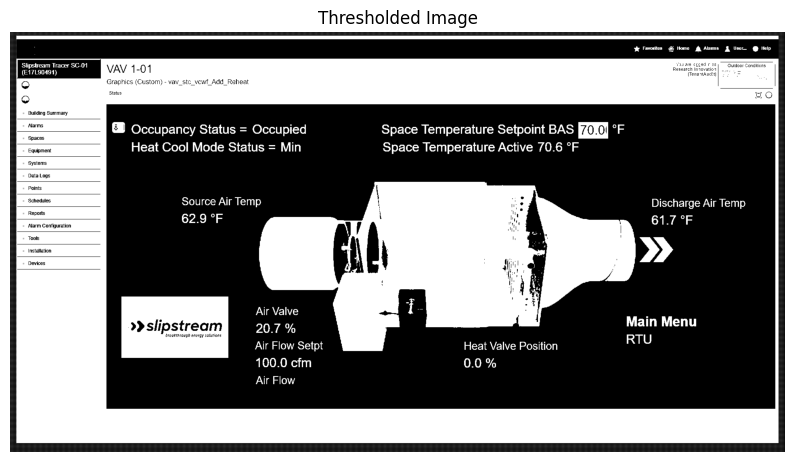

Text,Coordinates
(E17190491),"(30, 94, 86, 14)"
Building,"(46, 196, 41, 11)"
Summary,"(91, 196, 52, 11)"
‘Alarm:,"(45, 227, 31, 9)"
Spaces,"(45, 258, 40, 11)"
Equipment,"(46, 289, 56, 11)"
Systems,"(45, 320, 46, 11)"
Data,"(46, 351, 24, 9)"
Logs,"(74, 351, 25, 11)"
Fe,"(46, 382, 7, 9)"


In [3]:
import pandas as pd

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh, image

# Function to extract text and coordinates from an image
def image_to_text_with_coordinates(image_path):
    preprocessed_image, original_image = preprocess_image(image_path)
    data = pytesseract.image_to_data(preprocessed_image, output_type=pytesseract.Output.DICT)
    text_with_coords = []
    n_boxes = len(data['text'])
    
    for i in range(n_boxes):
        if int(data['conf'][i]) > 0:  # Filter out low-confidence results
            text = data['text'][i]
            x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
            text_with_coords.append((text, (x, y, w, h)))
    
    return text_with_coords, original_image, preprocessed_image

# Function to display the image with annotated text
def display_image_with_annotations(image, annotations):
    for text, (x, y, w, h) in annotations:
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        image = cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image with Annotations')
    plt.axis('off')
    plt.show()

# Function to display the thresholded image
def display_thresholded_image(thresh_image):
    plt.figure(figsize=(10, 10))
    plt.imshow(thresh_image, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')
    plt.show()

# Group text elements by proximity
def group_text_elements(text_with_coords, threshold=50):
    groups = []
    current_group = [text_with_coords[0]]
    
    for text, coords in text_with_coords[1:]:
        last_coords = current_group[-1][1]
        if abs(coords[1] - last_coords[1]) <= threshold:
            current_group.append((text, coords))
        else:
            groups.append(current_group)
            current_group = [(text, coords)]
    groups.append(current_group)
    return groups

# Sort text elements within each group
def sort_within_groups(groups):
    sorted_text_with_coords = []
    for group in groups:
        group.sort(key=lambda x: (x[1][1], x[1][0]))
        sorted_text_with_coords.extend(group)
    return sorted_text_with_coords

# Function to form a sentence from text elements
def form_sentence_from_text(text_with_coords):
    sentence = " ".join([text for text, _ in text_with_coords])
    return sentence

extracted_text_with_coords, original_image, thresh_image = image_to_text_with_coordinates(vav_copy_1)

# Group and sort text elements
groups = group_text_elements(extracted_text_with_coords)
sorted_text_with_coords = sort_within_groups(groups)

# Display the image with annotated text
display_image_with_annotations(original_image, sorted_text_with_coords)

# Display the thresholded image
display_thresholded_image(thresh_image)

# Convert the DataFrame to an HTML table and display it in a scrollable div
html_output = "<table><tr><th>Text</th><th>Coordinates</th></tr>"
for text, coords in sorted_text_with_coords:
    html_output += f"<tr><td>{text}</td><td>{coords}</td></tr>"
html_output += "</table>"
html_output = f"<div style='height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;'>{html_output}</div>"
display(HTML(html_output))

# Form and print a sentence from the text elements
sentence = form_sentence_from_text(sorted_text_with_coords)


In [4]:
print("FEED SENTENCE INTO CHATGPT")

sentence


FEED SENTENCE INTO CHATGPT


'(E17190491) Building Summary ‘Alarm: Spaces Equipment Systems Data Logs Fe Schedules Reports ‘Alarm Configuration Tools Installation Devices wi_Add_Reheat @ Occupancy Status Occupied = Heat Cool Mode Status Min = Source Air Temp 62.9 °F Air Valve slipstream >) 20.7 % — Air Flow Setpt 100.0 cim Air Flow Aloms ok @j J @ Favorites Home User Help Space Temperature Setpoint BAS oF Space Temperature Active 70.6 °F Discharge Air Temp 61.7 °F »> Main Menu RTU Heat Valve Position 0.0 % '

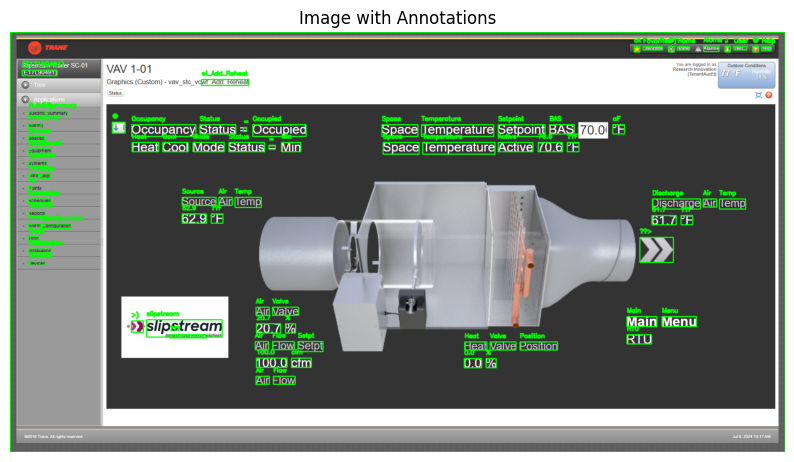

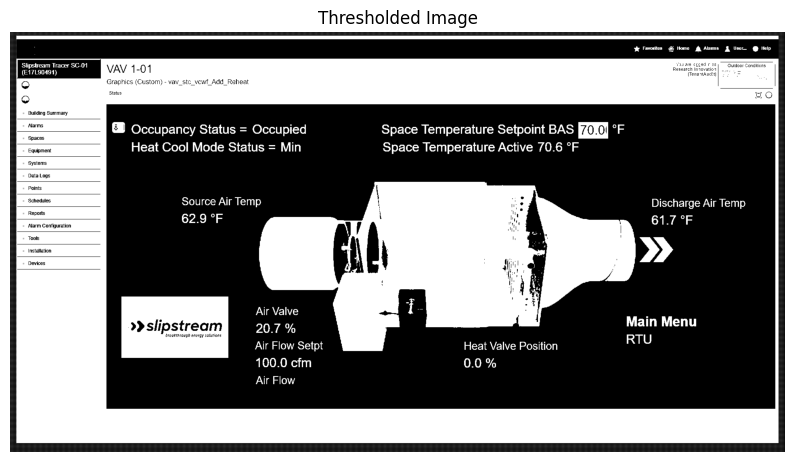

Text,Coordinates
(E17190491),"(30, 94, 86, 14)"
Building,"(46, 196, 41, 11)"
Summary,"(91, 196, 52, 11)"
‘Alarm:,"(45, 227, 31, 9)"
Spaces,"(45, 258, 40, 11)"
Equipment,"(46, 289, 56, 11)"
Systems,"(45, 320, 46, 11)"
Data,"(46, 351, 24, 9)"
Logs,"(74, 351, 25, 11)"
Fe,"(46, 382, 7, 9)"


FEED UNSORTED SENTENCE INTO CHATGPT
Are the sentences identical?  True
Unsorted Sentence:  (E17190491) Building Summary ‘Alarm: Spaces Equipment Systems Data Logs Fe Schedules Reports ‘Alarm Configuration Tools Installation Devices wi_Add_Reheat @ Occupancy Status Occupied = Heat Cool Mode Status Min = Source Air Temp 62.9 °F Air Valve slipstream >) 20.7 % — Air Flow Setpt 100.0 cim Air Flow Aloms ok @j J @ Favorites Home User Help Space Temperature Setpoint BAS oF Space Temperature Active 70.6 °F Discharge Air Temp 61.7 °F »> Main Menu RTU Heat Valve Position 0.0 % 


In [5]:
extracted_text_with_coords, original_image, thresh_image = image_to_text_with_coordinates(vav_copy_2)

# Group and sort text elements
groups = group_text_elements(extracted_text_with_coords)
unsorted_text_with_coords = sort_within_groups(groups)

# Display the image with annotated text
display_image_with_annotations(original_image, unsorted_text_with_coords)

# Display the thresholded image
display_thresholded_image(thresh_image)

# Convert the list to an HTML table and display it in a scrollable div
html_output = "<table><tr><th>Text</th><th>Coordinates</th></tr>"
for text, coords in unsorted_text_with_coords:
    html_output += f"<tr><td>{text}</td><td>{coords}</td></tr>"
html_output += "</table>"
html_output = f"<div style='height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;'>{html_output}</div>"
display(HTML(html_output))

# Form and print a sentence from the text elements
unsorted_sentence = form_sentence_from_text(unsorted_text_with_coords)

# Programmatically check if the sentences are the same
print("FEED UNSORTED SENTENCE INTO CHATGPT")
print("Are the sentences identical? ", sentence == unsorted_sentence)
print("Unsorted Sentence: ", unsorted_sentence)


## Ask Chat GPT to be RCx Mechanical Engineer

The following data is extracted with computer vision OCR from an air handling unit HVAC system BAS graphic of a VAV box. Please provide feedback to the human building operator in the following format:

The VAV box is currently operating in [mode of operation: heating, cooling, or dehumidification] mode. The outside air temperature is [outside air temperature], indicating the building is primarily in [heating/cooling] mode. The VAV box is maintaining a zone setpoint of [zone setpoint], with the current zone temperature at [zone temperature], indicating [how well the setpoint is met]. The average air flow is [average air flow if available] CFM, with an airflow setpoint of [airflow setpoint if available]. The reheat coil is [status: modulating/not modulating], with a reheat temperature rise of [temperature rise] and airflow volume during reheat mode at [airflow volume] CFM.

The outside air temperature of [outside air temperature] suggests the building should be in [heating/cooling] mode. However, due to AHU discharge air dehumidification in humid climates, the VAV box may switch to heating mode during the summer. In heating mode, the reheat coil increases the temperature by [temperature rise], and the CFM volume is [airflow volume]. The VAV box appears to be [assessment of performance: operating properly or with faults], with observable faults including [broken/stuck reheat coil, broken/stuck air damper, over cooling, under cooling]. The average CO2 level is [CO2 level in PPM], with a fault flagged if levels rise above 1000 PPM. Current observations show [CO2 level observation].

Overall, the VAV box [general assessment of performance]. Recommendations for improvement include [recommendations for improvement, e.g., operational adjustments, maintenance]. Additionally, evaluating [specific operational parameters or setpoints] further could enhance [ventilation requirements, energy efficiency].

## Chat GPT analysis

Here is the virtual AI RCx mechanical engineer feedback based on the extracted data:

---

The VAV box is currently operating in cooling mode. The outside air temperature is 62.9°F, indicating the building is primarily in cooling mode. The VAV box is maintaining a zone setpoint of 70.6°F, with the current zone temperature at 70.6°F, indicating the setpoint is met precisely. The average air flow is 100.0 CFM, with an airflow setpoint of 100.0 CFM. The reheat coil is not modulating, with a reheat temperature rise not applicable, and airflow volume during reheat mode is 0.0 CFM.

The outside air temperature of 62.9°F suggests the building should be in cooling mode. However, due to AHU discharge air dehumidification in humid climates, the VAV box may switch to heating mode during the summer. In heating mode, the reheat coil increases the temperature by 0.0°F, and the CFM volume is 0.0 CFM. The VAV box appears to be operating properly, with no observable faults such as broken/stuck reheat coil, broken/stuck air damper, over cooling, or under cooling. The average CO2 level is not provided, with a fault flagged if levels rise above 1000 PPM. Current observations show no CO2 level observation.

Overall, the VAV box is operating properly. Recommendations for improvement include ensuring regular maintenance checks to verify the status of the reheat coil and air dampers. Additionally, evaluating the discharge air temperature setpoints further could enhance energy efficiency.